In [ ]:
from typing_extensions import dataclass_transform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the data
url = "https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt"

# Function to load data from a URL
def load_data(url):
    """
    Loads data from a URL and returns it as a DataFrame.
    """
    data = pd.read_csv(url, sep="\s+", header=None, names=["Gene", "log2FoldChange", "pvalue", "padj"])

    # Convert 'log2FoldChange' and 'pvalue' columns to numeric
    data['log2FoldChange'] = pd.to_numeric(data['log2FoldChange'], errors='coerce')
    data['pvalue'] = pd.to_numeric(data['pvalue'], errors='coerce')
    return data
print(load_data(url))




          Gene  log2FoldChange        pvalue       padj
0         Gene             NaN           NaN       padj
1         DOK6        0.510000  1.861000e-08  0.0003053
2         TBX5       -2.129000  5.655000e-08  0.0004191
3      SLC32A1        0.900300  7.664000e-08  0.0004191
4       IFITM1       -1.687000  3.735000e-06   0.006809
...        ...             ...           ...        ...
16402     PKLR       -0.000191  9.996000e-01     0.9999
16403    OBFC1       -0.000046  9.998000e-01     0.9999
16404    FKBP8       -0.000055  9.997000e-01     0.9999
16405     LRMP       -0.000037  9.999000e-01          1
16406     OXSM        0.000009  1.000000e+00          1

[16407 rows x 4 columns]


In [ ]:
# Function to classify genes based on log2FoldChange and p-value
def classify_genes(data):
    """
    Classifies genes as 'Upregulated', 'Downregulated', or 'Not Significant'
    based on their log2FoldChange and p-value.
    """
    data['Status'] = 'Not Significant'
    data.loc[(data['log2FoldChange'] > 1) & (data['pvalue'] < 0.01), 'Status'] = 'Upregulated'
    data.loc[(data['log2FoldChange'] < -1) & (data['pvalue'] < 0.01), 'Status'] = 'Downregulated'
    return data




Top 5 Upregulated Genes:
       Gene  log2FoldChange    pvalue      padj       Status
21    DTHD1           1.540  0.000056   0.04371  Upregulated
6   EMILIN2           1.534  0.000003  0.006809  Upregulated
30     PI16           1.495  0.000130   0.07794  Upregulated
35  C4orf45           1.288  0.000247    0.1159  Upregulated
75  FAM180B           1.249  0.001146    0.2399  Upregulated
Top 5 Downregulated Genes:
       Gene  log2FoldChange        pvalue       padj         Status
2      TBX5          -2.129  5.655000e-08  0.0004191  Downregulated
4    IFITM1          -1.687  3.735000e-06   0.006809  Downregulated
10      TNN          -1.658  8.973000e-06    0.01472  Downregulated
12  COL13A1          -1.647  1.394000e-05    0.01592  Downregulated
13   IFITM3          -1.610  1.202000e-05    0.01592  Downregulated


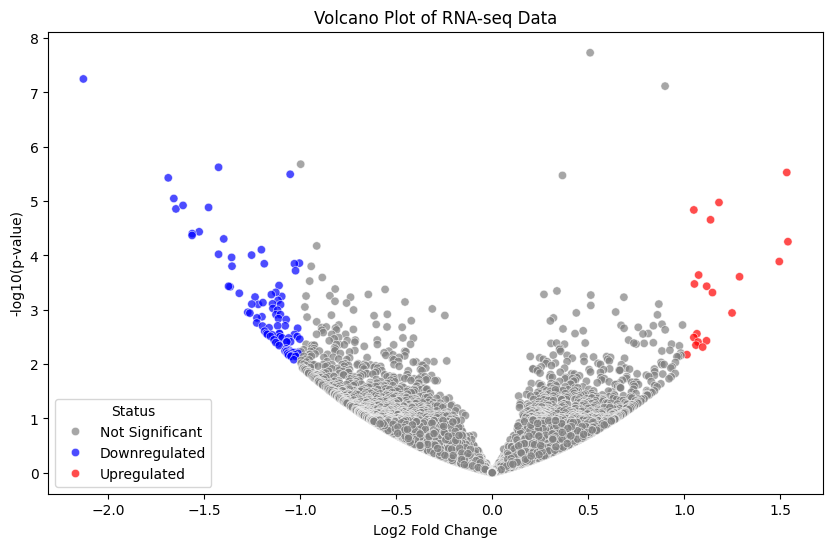

In [ ]:
# Function to display the top upregulated or downregulated genes
def display_top_genes(data, status, n=5):
    """
    Displays the top n upregulated or downregulated genes.
    """
    subset = data[data['Status'] == status]
    if status == 'Upregulated':
        return subset.nlargest(n, 'log2FoldChange')
    elif status == 'Downregulated':
        return subset.nsmallest(n, 'log2FoldChange')

# Function to create a volcano plot
def create_volcano_plot(data):
    """
    Creates a volcano plot to visualize regulated genes.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='log2FoldChange', y=-np.log10(data['pvalue']), hue='Status', data=data,
                    palette={'Upregulated': 'red', 'Downregulated': 'blue', 'Not Significant': 'gray'}, alpha=0.7)
    plt.title('Volcano Plot of RNA-seq Data')
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10(p-value)')
    plt.show()

# Load the data
diseased_cell = load_data(url)

# Classify the genes
diseased_cell = classify_genes(diseased_cell)

# Display the top 5 upregulated genes
print("Top 5 Upregulated Genes:")
print(display_top_genes(diseased_cell, 'Upregulated'))

# Display the top 5 downregulated genes
print("Top 5 Downregulated Genes:")
print(display_top_genes(diseased_cell, 'Downregulated'))

# Create a volcano plot
create_volcano_plot(diseased_cell)

#The function of the gene DTHD1 is protein binding
#The funtions of the gene EMILIN2 are protein binding	and enabling extracellular matrix constituent conferring elasticity
#The functions of the gene PI16 are peptidase inhibitor activity and protein binding
#The function of the gene C4orf45 is protein binding
#The function of the gene FAM180B is protein binding


# Functions of the downregulated genes :
# The funtions of the gene TBX5	is DNA-binding protein that regulates the transcription of several genes and is involved in heart development and limb pattern formation
# The funtions of the gene IFITM1	is inhibiting the entry of viruses to the host cell cytoplasm, permitting endocytosis, but preventing subsequent viral fusion and release of viral contents into the cytosol.
# The funtions of the gene TNN is a ligand for ITGA8:ITGB1, ITGAV:ITGB1 and ITGA4:ITGB1, involved in neurite outgrowth and cell migration in hippocampal explants
# The funtions of the gene COL13A1 is cell-matrix and cell-cell adhesion interactions that are required for normal development.
# The funtions of the gene IFITM3 is disruption of intracellular cholesterol homeostasis.